In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
import numpy as np
from LinearMPC_template.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis
from scipy.optimize import least_squares


rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

Subsystem x: 

Input upper bounds are [0.26179939]
Input lower bounds are [-0.26179939]
State upper bounds are [50.          0.17453293 50.        ]
State lower bounds are [-50.          -0.17453293 -50.        ] 

Not yet convgerged at iteration 1
Not yet convgerged at iteration 2
Not yet convgerged at iteration 3
Not yet convgerged at iteration 4
Not yet convgerged at iteration 5
Not yet convgerged at iteration 6
Not yet convgerged at iteration 7
Not yet convgerged at iteration 8
Maximum invariant set found after 9 iterations !

Subsystem y: 

Input upper bounds are [0.26179939]
Input lower bounds are [-0.26179939]
State upper bounds are [50.          0.17453293 50.        ]
State lower bounds are [-50.          -0.17453293 -50.        ] 

Not yet convgerged at iteration 1
Not yet convgerged at iteration 2
Not yet convgerged at iteration 3
Not yet convgerged at iteration 4
Not yet convgerged at iteration 5
Not yet convgerged at iteration 6
Not yet convgerged at iteration 7
Not yet co

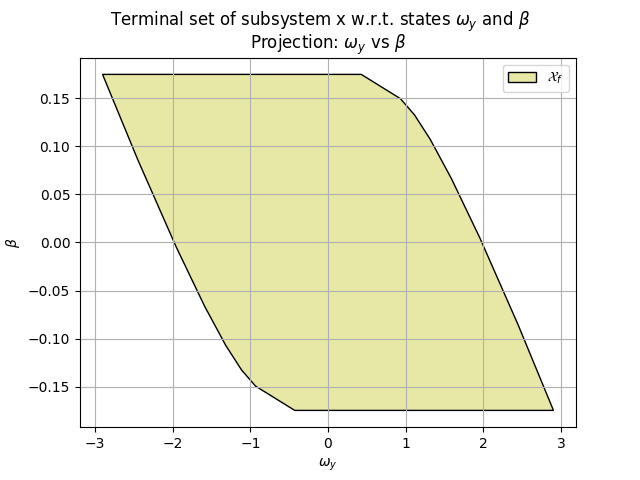

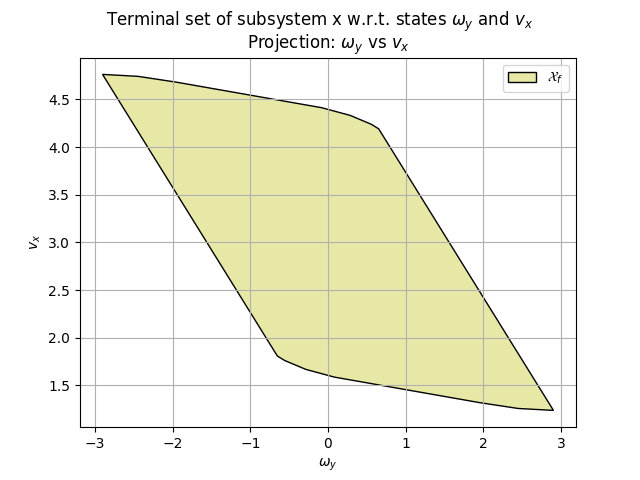

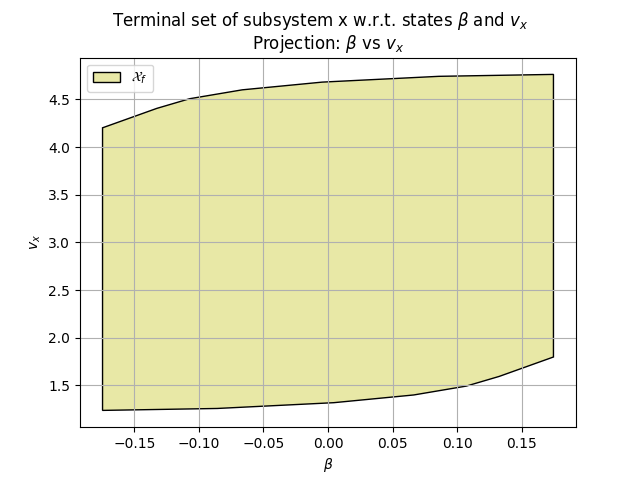

u0 for system x is [-0.26179939]

x_ol for system x is [[-6.41449136e-14  8.57063713e-01  1.71412743e+00  8.98666147e-01
   4.16024343e-02 -4.16024343e-02  2.79249293e-02 -1.42474239e-02
   1.42468026e-02 -1.42461808e-02  1.42166566e-02 -1.41871327e-02
   1.37238215e-02 -1.32605105e-02  1.32480633e-02 -1.32356159e-02
   1.32354795e-02 -1.32353431e-02  1.32353345e-02 -1.32353261e-02
   1.32353247e-02 -1.32353235e-02  1.32353233e-02 -1.32353233e-02
   1.32353237e-02 -1.40776040e-02 -9.16929465e-02 -1.48402400e-01
  -1.84524459e-01 -2.05033582e-01 -2.14142682e-01 -2.15097167e-01
  -2.10360005e-01 -2.01786085e-01 -1.90760899e-01 -1.78308905e-01
  -1.65177924e-01 -1.51904735e-01 -1.38865968e-01 -1.26317494e-01
  -1.14424833e-01 -1.03286554e-01 -9.29522227e-02 -8.34361011e-02
  -7.47275584e-02 -6.67989299e-02 -5.96114070e-02 -5.31194106e-02
  -4.72738004e-02 -4.20241950e-02 -3.73206154e-02 -3.31146168e-02
  -2.93600373e-02 -2.60134607e-02 -2.30344689e-02 -2.03857421e-02
  -1.80330513e-02 -1.

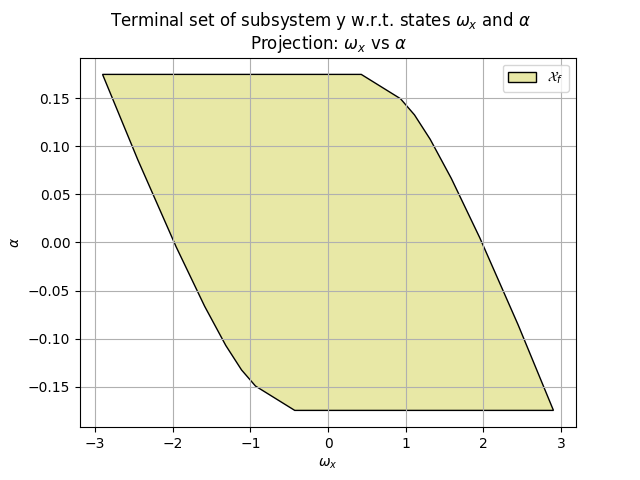

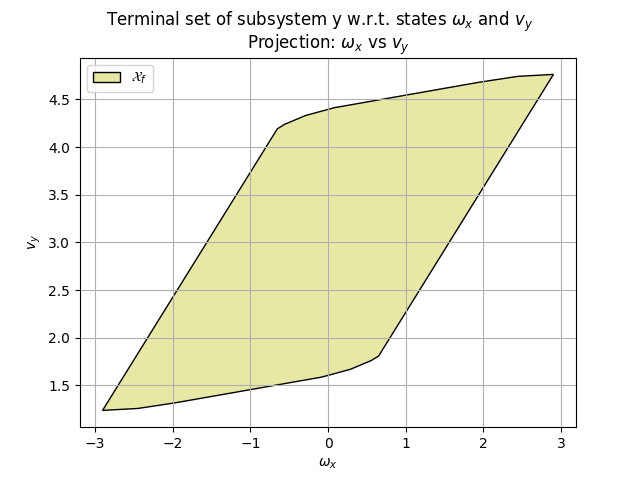

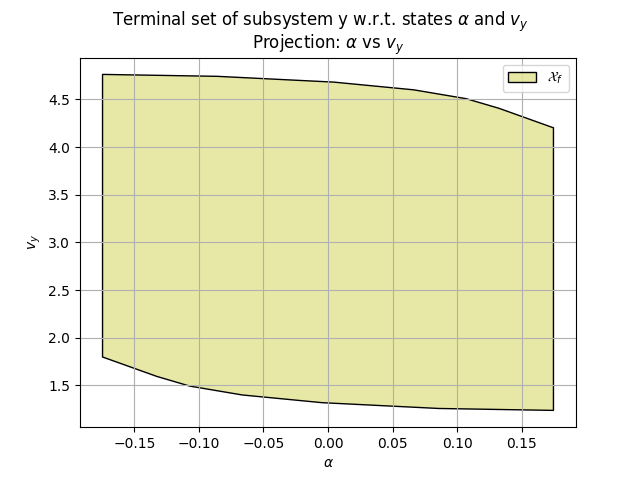

u0 for system y is [0.26179939]

x_ol for system y is [[ 6.41449136e-14 -8.57063713e-01 -1.71412743e+00 -8.98666147e-01
  -4.16024343e-02  4.16024343e-02 -2.79249293e-02  1.42474239e-02
  -1.42468026e-02  1.42461808e-02 -1.42166566e-02  1.41871327e-02
  -1.37238215e-02  1.32605105e-02 -1.32480633e-02  1.32356159e-02
  -1.32354795e-02  1.32353431e-02 -1.32353345e-02  1.32353261e-02
  -1.32353247e-02  1.32353235e-02 -1.32353233e-02  1.32353233e-02
  -1.32353237e-02  1.40776040e-02  9.16929465e-02  1.48402400e-01
   1.84524459e-01  2.05033582e-01  2.14142682e-01  2.15097167e-01
   2.10360005e-01  2.01786085e-01  1.90760899e-01  1.78308905e-01
   1.65177924e-01  1.51904735e-01  1.38865968e-01  1.26317494e-01
   1.14424833e-01  1.03286554e-01  9.29522227e-02  8.34361011e-02
   7.47275584e-02  6.67989299e-02  5.96114070e-02  5.31194106e-02
   4.72738004e-02  4.20241950e-02  3.73206154e-02  3.31146168e-02
   2.93600373e-02  2.60134607e-02  2.30344689e-02  2.03857421e-02
   1.80330513e-02  1.5

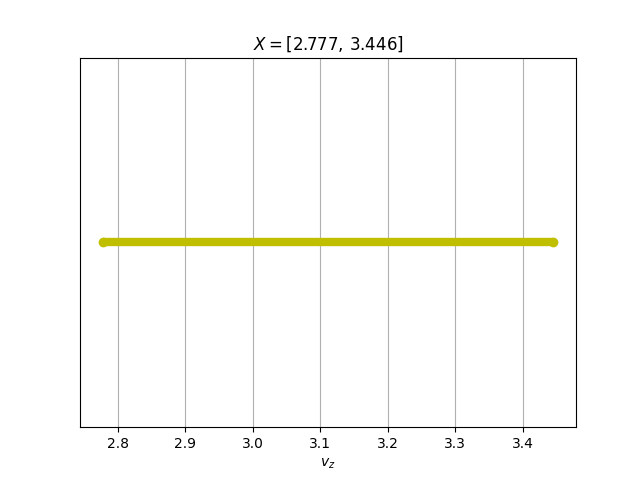

RuntimeError: QP problem failed: infeasible

In [29]:
Ts = 0.05
sim_time = 7
H = 5.0

#x0 definition : completely stationnary
omega_x0 = 0; omega_y0 = 0; omega_z0 = 0; alpha0 = 0; beta0 = 0; gamma0 = 0; v_x0 = 0; v_y0 = 0; v_z0 = 0
x0_full = np.array([omega_x0, omega_y0, omega_z0, alpha0, beta0, gamma0, v_x0, v_y0, v_z0, 0, 0, 0])

#x_target definition : 3 m/s velocities and 35° roll
# Note : 
# 1. x_target already re-shaped from (n,) to (n x N_cl + 1 in simulate_control)
# 2. position targets set at 0. This does NOT lead to any problem at this point because the method mpc.get_u() always keeps position states at 0 and so this target is always fullfilled
#    i.e. it is an equilibrium if states not taken into account.

omega_x_target = 0; omega_y_target = 0; omega_z_target = 0; alpha_target = 0; beta_target = 0; gamma_target = np.deg2rad(35); v_x_target = 3; v_y_target = 3; v_z_target = 3
x_target = np.array([omega_x_target, omega_y_target, omega_z_target, alpha_target, beta_target, gamma_target, v_x_target, v_y_target, v_z_target, 0, 0, 0]) 

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# u_target = u_s, so no need to specify it (see goodnotes)

# simulation
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0_full, x_target=x_target, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=x_target.reshape(-1, 1).repeat(u_cl.shape[1], axis=1),
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
)